# Activity Analysis Demonstration script
This notebook draws from the demo 1 file of ActivityAnalysisToolbox_2.1

In [2]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d

In [176]:
# import activity analysis functions from aa.py file in the same folder as this jupiter notebook
%load_ext autoreload
%autoreload 1
%aimport aa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# load data, for now in mat files. Change for csv?
import scipy.io
mat = scipy.io.loadmat('data/Korhonen.mat')
c = mat['Kor']
Kor = []
for stim in range(len(c)):
    Data = pd.DataFrame()
    Time = []
    t = c[stim][0][0][0][0]
    d = c[stim][0][0][0][1]
    for i in range(len(c[11][0][0][0][0])):
        Time.append(t[i][0])
        Data = Data.append( pd.Series(d[i]), ignore_index=True)
    Data.index = Time
    sF = c[stim][0][0][0][2][0][0]
    Np = c[stim][0][0][0][3][0][0]
    Measure = c[stim][0][0][0][4][0]
    Piece = c[stim][0][0][0][5][0]
    Audience = c[stim][0][0][0][6][0]
    NrData = pd.DataFrame()
    d = c[stim][0][0][0][7]
    for i in range(len(c[11][0][0][0][0])):
        NrData = NrData.append( pd.Series(d[i]), ignore_index=True)
    NrData.index = Time
    NzData = pd.DataFrame()
    d = c[stim][0][0][0][8]
    for i in range(len(c[11][0][0][0][0])):
        NzData = NzData.append( pd.Series(d[i]), ignore_index=True)
    NzData.index = Time
    Spec = c[stim][0][0][0][9]
    coll = {'Time':Time,
       'Data': Data,
       'sF':sF,
       'Np':Np,
       'Measure':Measure,
       'Piece':Piece,
       'Audience':Audience,
       'NrData':NrData,
       'NzData': NzData,
       'Spec':Spec}
    Kor.append(coll)

Select a collection of ratings to run an analysis on

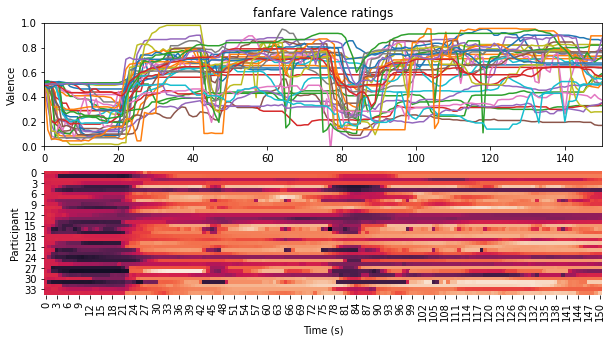

In [143]:
collN = 5
D = Kor[collN]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(211)
D['Data'].plot(ax=ax,legend=False)
plt.ylim(0,1)
plt.xlim(D['Time'][0],D['Time'][-1])
plt.title(D['Piece'] + ' ' + D['Measure'] + ' ratings')
plt.ylabel(D['Measure'])

ax = fig.add_subplot(212)
sns.heatmap(D['Data'].transpose(),ax=ax,cbar=False)#, cmap="YlGnBu")
plt.ylabel('Participant')
plt.xlabel('Time (s)')
plt.show()

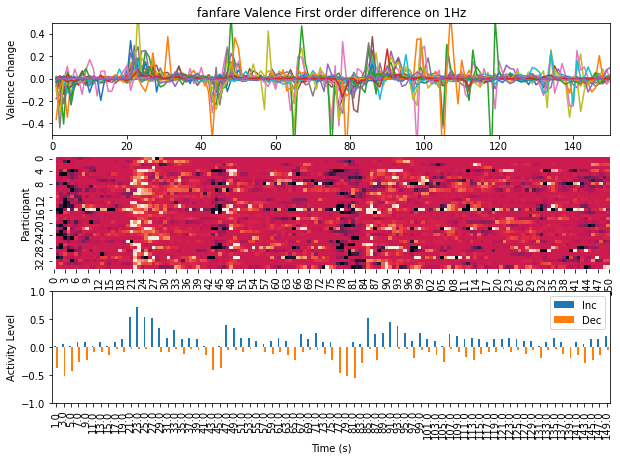

In [197]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(311)
D['Data'].diff().plot(ax=ax,legend=False)
plt.ylim(-0.5,0.5)
plt.xlim(D['Time'][0],D['Time'][-1])
plt.title(D['Piece'] + ' ' + D['Measure'] + ' First order difference on ' + str(D['sF']) + 'Hz')
plt.ylabel(D['Measure'] + ' change')
ax = fig.add_subplot(312)
sns.heatmap(D['Data'].diff().transpose(),ax=ax,cbar=False,vmin=-0.1, vmax=0.1)#, cmap="YlGnBu")
plt.ylabel('Participant')

FrameSize = 2
HopSize = 2
Thresh = 0.025
ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Inc')
AC=pd.DataFrame({'Inc':ACTS['Total']})
ACTS=aa.activityCount(D['Data'],FrameSize,HopSize,Thresh,'Dec')
AC['Dec'] = -ACTS['Total']
ax = fig.add_subplot(313)
AC.plot.bar(ax=ax)
plt.ylim(-1,1)
#plt.xlim(D['Time'][0],D['Time'][-1])
plt.ylabel('Activity Level')
plt.xlabel('Time (s)')
plt.show()

In [196]:
AC

,Inc,Dec
Time,,
1.0,0.028571,-0.371429
3.0,0.057143,-0.514286
5.0,0.028571,-0.428571
7.0,0.085714,-0.257143
9.0,0.085714,-0.228571
...,...,...
141.0,0.085714,-0.142857
143.0,0.057143,-0.285714
145.0,0.142857,-0.228571


In [199]:
# simple activity test
# function [Chi,pVal,DAct,bins] = simpleActivityTest(AC,N,Nbins,P)
A = AC['Inc']
N = D['Np']
Nbins = 4;

ac = np.round(A.values*N) # get these back to count values, integers
L=len(ac)
n = N
aL = np.arange(n)


In [203]:
pd.Series(ac).value_counts()

5.0     12
3.0     11
6.0      8
1.0      8
4.0      7
0.0      5
9.0      4
2.0      4
8.0      3
12.0     2
18.0     2
19.0     2
7.0      2
14.0     1
11.0     1
13.0     1
25.0     1
16.0     1
dtype: int64